### NEURAL NETWORK REGRESSION ON BIKE SHARING DEMAND  DATA SET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
warnings.filterwarnings('ignore')


In [2]:
training_df = pd.read_csv('train.csv')

In [3]:
training_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [4]:
training_df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy

    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

In [5]:
training_df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [6]:
training_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10881    False
10882    False
10883    False
10884    False
10885    False
Length: 10886, dtype: bool

In [7]:
training_df.shape

(10886, 12)

In [8]:
training_df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [9]:
training_df['datetime'] = training_df['datetime'].apply(pd.to_datetime)

In [10]:
training_df['Time'] = training_df["datetime"].dt.time

In [11]:
training_df["Month"] = training_df["datetime"].dt.month

In [12]:
training_df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Time,Month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,00:00:00,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,01:00:00,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,02:00:00,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,03:00:00,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,04:00:00,1


#### printing all the valid color names

In [13]:
all_color = plt.colormaps()
print(all_color)

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'G

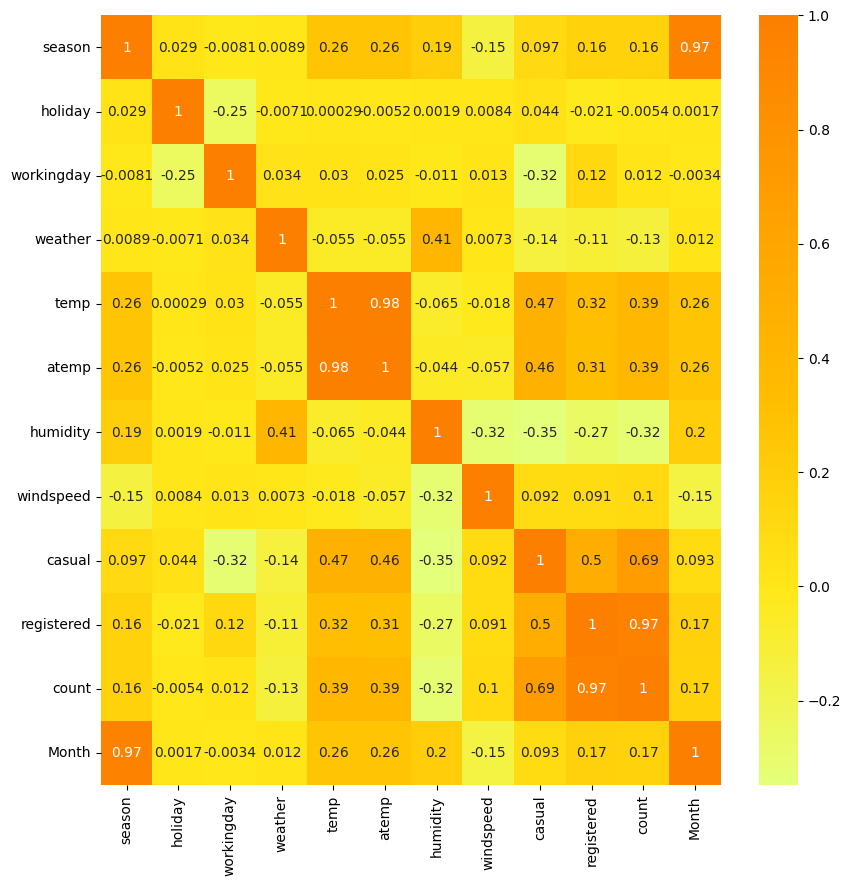

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(training_df.corr() ,annot =True,cmap="Wistia")
plt.show()

In [15]:
training_df.drop("datetime",axis=1,inplace=True)

In [16]:
order = ['Time' ,'Month',"season",	"holiday",	"workingday",	"weather",	"temp", "atemp", "humidity", "windspeed", "casual",	"registered","count"]
training_df = training_df[order +[col for col in training_df if col not in order]]

In [17]:
training_df.drop("atemp",axis=1,inplace=True)

In [18]:
training_df.head(5)

,Time,Month,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count
0,00:00:00,1,1,0,0,1,9.84,81,0.0,3,13,16
1,01:00:00,1,1,0,0,1,9.02,80,0.0,8,32,40
2,02:00:00,1,1,0,0,1,9.02,80,0.0,5,27,32
3,03:00:00,1,1,0,0,1,9.84,75,0.0,3,10,13
4,04:00:00,1,1,0,0,1,9.84,75,0.0,0,1,1


In [19]:
training_df["count"].value_counts()

5      169
4      149
3      144
6      135
2      132
      ... 
801      1
629      1
825      1
589      1
636      1
Name: count, Length: 822, dtype: int64

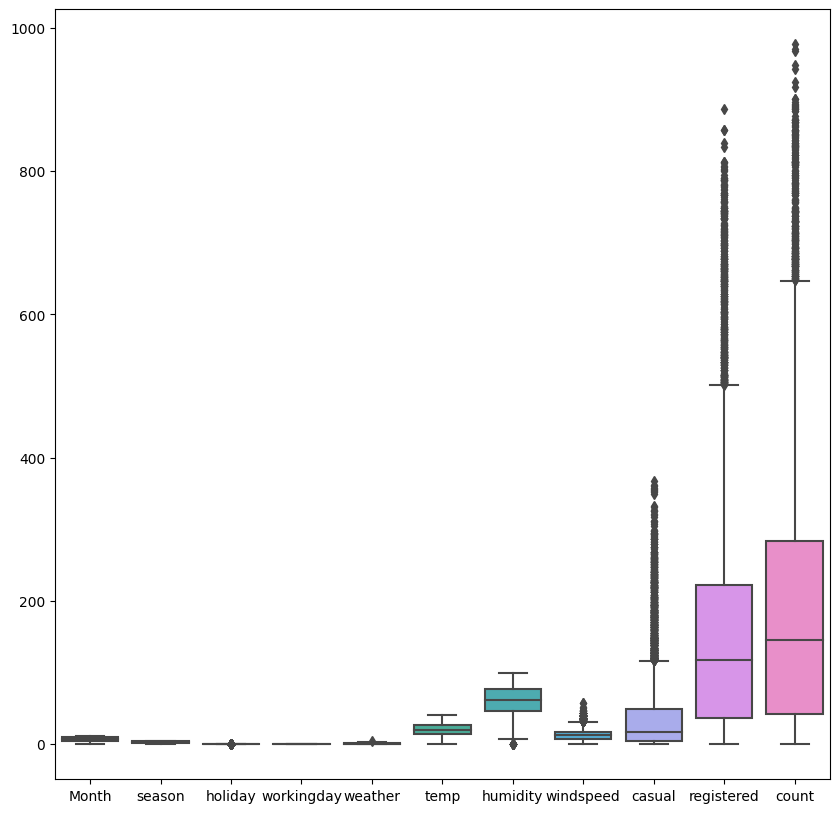

In [20]:
plt.figure(figsize=(10,10))
sns.boxplot(data = training_df)
plt.show()

In [21]:
def find_outlier(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    outliers = series[((series < (q1 - 1.5 * iqr)) | (series > (q3 + 1.5 * iqr)))]
    return outliers


In [22]:
windspeed_outlier = find_outlier(training_df['windspeed'])
print("number of windspeed outliers:" +  str(len(windspeed_outlier)))
print("max outlier values:" + str(windspeed_outlier.max()))
print("min outlier values:" + str(windspeed_outlier.min()))

print("---------------------------------------------------")

casual_outlier = find_outlier(training_df['casual'])
print("number of casual outliers:" +  str(len(casual_outlier)))
print("max outlier values:" + str(casual_outlier.max()))
print("min outlier values:" + str(casual_outlier.min()))

print("---------------------------------------------------")

registered_outlier = find_outlier(training_df['registered'])
print("number of registered outliers:" +  str(len(registered_outlier)))
print("max outlier values:" + str(registered_outlier.max()))
print("min outlier values:" + str(registered_outlier.min()))

print("---------------------------------------------------")

count_outlier = find_outlier(training_df['count'])
print("number of count outliers:" +  str(len(count_outlier)))
print("max outlier values:" + str(count_outlier.max()))
print("min outlier values:" + str(count_outlier.min()))


number of windspeed outliers:227
max outlier values:56.9969
min outlier values:32.9975
---------------------------------------------------
number of casual outliers:749
max outlier values:367
min outlier values:117
---------------------------------------------------
number of registered outliers:423
max outlier values:886
min outlier values:502
---------------------------------------------------
number of count outliers:300
max outlier values:977
min outlier values:648


In [23]:
# Outlier Treatment
training_df.drop(training_df[training_df['windspeed'] > 50].index, inplace = True)
training_df.drop(training_df[training_df['casual'] > 170].index, inplace = True)
training_df.drop(training_df[training_df['registered'] > 400].index, inplace = True)
training_df.drop(training_df[training_df['count'] > 600].index, inplace = True)

In [27]:
training_df.shape

(9759, 12)

In [32]:
training_df.dtypes


Time           object
Month           int64
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [33]:
training_df['Time'] = pd.to_datetime(training_df['Time'], format='%H:%M:%S').dt.time.apply(lambda x: x.strftime('%H:%M:%S'))

In [34]:
x_train ,x_temp ,y_train,y_temp = train_test_split(training_df.drop("count",axis=1),training_df["count"],test_size=0.3,random_state=42)
x_test ,x_val , y_test,y_val = train_test_split(x_temp,y_temp,test_size=0.5,random_state=42)

In [36]:
x_train['Time'] = pd.to_datetime(x_train['Time'], format='%H:%M:%S').dt.hour * 3600 + pd.to_datetime(x_train['Time'], format='%H:%M:%S').dt.minute * 60 + pd.to_datetime(x_train['Time'], format='%H:%M:%S').dt.second
x_val['Time'] = pd.to_datetime(x_val['Time'], format='%H:%M:%S').dt.hour * 3600 + pd.to_datetime(x_val['Time'], format='%H:%M:%S').dt.minute * 60 + pd.to_datetime(x_val['Time'], format='%H:%M:%S').dt.second
x_test['Time'] = pd.to_datetime(x_test['Time'], format='%H:%M:%S').dt.hour * 3600 + pd.to_datetime(x_test['Time'], format='%H:%M:%S').dt.minute * 60 + pd.to_datetime(x_test['Time'], format='%H:%M:%S').dt.second

In [37]:
x_train_tensor = tf.convert_to_tensor(x_train,dtype=tf.float32)
x_val_tensor = tf.convert_to_tensor(x_val,dtype=tf.float32)
x_test_tensor = tf.convert_to_tensor(x_test,dtype=tf.float32)

y_train_tensor = tf.convert_to_tensor(y_train,dtype=tf.float32)
y_val_tensor = tf.convert_to_tensor(y_val,dtype=tf.float32)   
y_test_tensor = tf.convert_to_tensor(y_test,dtype=tf.float32)

In [38]:
tf.random.set_seed(42)

model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1)
])
model1.compile(tf.keras.optimizers.Adam(learning_rate=0.001),loss='mse',metrics=['mae'])
history = model1.fit(x_train_tensor,y_train_tensor,epochs=100,validation_data=(x_val_tensor,y_val_tensor))

Epoch 1/100
214/214 [==============================] - 14s 24ms/step - loss: 36797.0391 - mae: 128.3278 - val_loss: 16666.0195 - val_mae: 97.0771
Epoch 2/100
214/214 [==============================] - 3s 15ms/step - loss: 11575.6543 - mae: 78.4447 - val_loss: 5797.8379 - val_mae: 58.6804
Epoch 3/100
214/214 [==============================] - 3s 16ms/step - loss: 3498.6350 - mae: 44.0617 - val_loss: 1083.3011 - val_mae: 26.2345
Epoch 4/100
214/214 [==============================] - 4s 16ms/step - loss: 891.4580 - mae: 22.8454 - val_loss: 177.8010 - val_mae: 10.8797
Epoch 5/100
214/214 [==============================] - 3s 15ms/step - loss: 130.9590 - mae: 9.2353 - val_loss: 155.7247 - val_mae: 10.5092
Epoch 6/100
214/214 [==============================] - 3s 15ms/step - loss: 36.4509 - mae: 4.7954 - val_loss: 15.2308 - val_mae: 3.1728
Epoch 7/100
214/214 [==============================] - 3s 16ms/step - loss: 16.5280 - mae: 3.2255 - val_loss: 7.0501 - val_mae: 2.1478
Epoch 8/100
214/214

In [43]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
tf.keras.utils.plot_model(model1,show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


[]

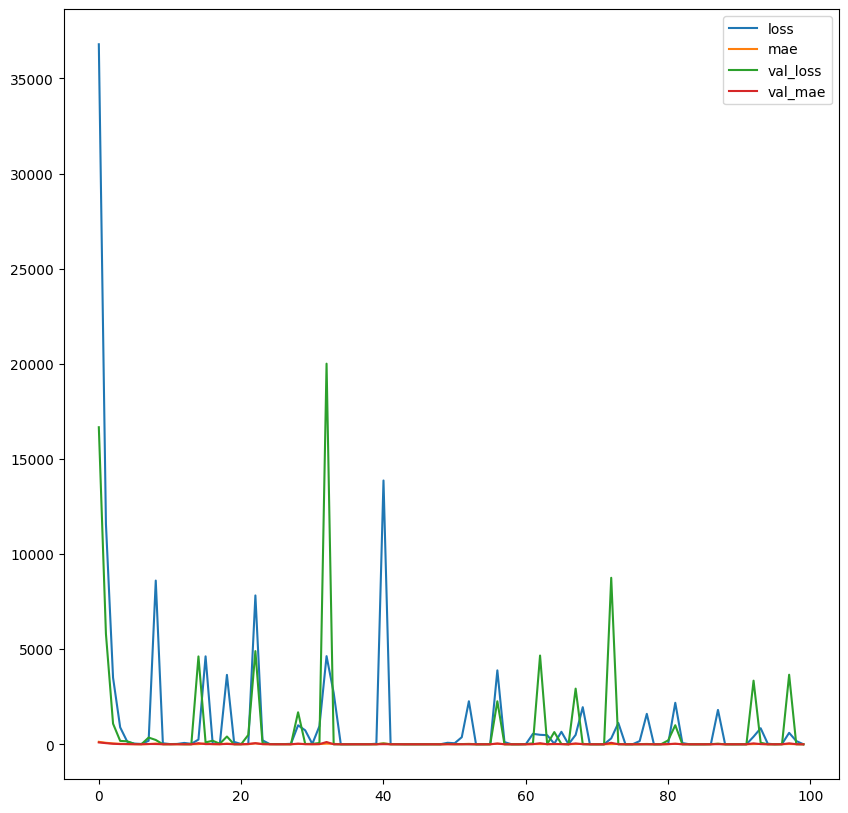

In [45]:
pd.DataFrame(history.history).plot(figsize=(10,10))
plt.plot()

In [46]:
model1.evaluate(x_test_tensor,y_test_tensor)

46/46 [==============================] - 1s 14ms/step - loss: 0.0523 - mae: 0.1631


[0.05229048430919647, 0.1631026715040207]

In [47]:
y_pred = model1.predict(x_test_tensor)

46/46 [==============================] - 2s 11ms/step


In [49]:
mean_absolute_error = tf.keras.losses.MAE(y_test_tensor,y_pred)
mean_absolute_error

<tf.Tensor: shape=(1464,), dtype=float32, numpy=
array([226.37111 , 120.89871 , 105.256966, ..., 105.28951 , 140.45078 ,
       146.15886 ], dtype=float32)>

In [56]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1,activation='linear')
])
model2.compile(loss='mae',optimizer='adam',metrics=['mae'])


In [58]:
model2.fit(x_train_tensor,y_train_tensor,epochs=100,validation_data=(x_val_tensor,y_val_tensor))

Epoch 1/100
214/214 [==============================] - 21s 37ms/step - loss: 96.8650 - mae: 96.8650 - val_loss: 79.9505 - val_mae: 79.9505
Epoch 2/100
214/214 [==============================] - 6s 27ms/step - loss: 80.6766 - mae: 80.6766 - val_loss: 84.3396 - val_mae: 84.3396
Epoch 3/100
214/214 [==============================] - 6s 28ms/step - loss: 62.4796 - mae: 62.4796 - val_loss: 28.5218 - val_mae: 28.5218
Epoch 4/100
214/214 [==============================] - 6s 28ms/step - loss: 33.1695 - mae: 33.1695 - val_loss: 52.9510 - val_mae: 52.9510
Epoch 5/100
214/214 [==============================] - 7s 35ms/step - loss: 29.6670 - mae: 29.6670 - val_loss: 23.7260 - val_mae: 23.7260
Epoch 6/100
214/214 [==============================] - 7s 35ms/step - loss: 25.2036 - mae: 25.2036 - val_loss: 21.0128 - val_mae: 21.0128
Epoch 7/100
214/214 [==============================] - 7s 35ms/step - loss: 16.4411 - mae: 16.4411 - val_loss: 9.8662 - val_mae: 9.8662
Epoch 8/100
214/214 [==============

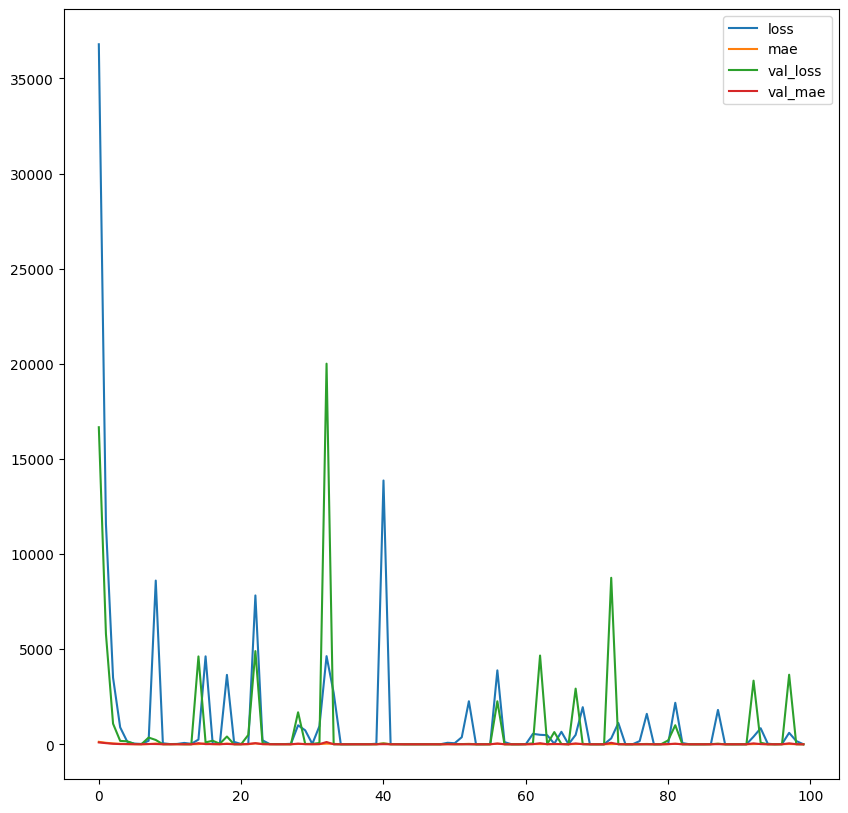

In [59]:
pd.DataFrame(history.history).plot(figsize=(10,10))
plt.show()

In [60]:
model2.evaluate(x_test_tensor,y_test_tensor)

46/46 [==============================] - 1s 16ms/step - loss: 3.0129 - mae: 3.0129


[3.0129246711730957, 3.0129246711730957]

In [61]:
y_pred = model2.predict(x_test_tensor)

46/46 [==============================] - 6s 19ms/step


In [63]:
mean_absolute_error = tf.keras.losses.MAE(y_test_tensor,y_pred)

In [64]:
mean_absolute_error

<tf.Tensor: shape=(1464,), dtype=float32, numpy=
array([220.48933 , 119.72458 , 105.341   , ..., 105.346855, 140.88751 ,
       145.98749 ], dtype=float32)>

In [65]:
result = np.concatenate((y_pred.reshape(-1, 1), y_test_tensor.numpy().reshape(-1, 1)), axis=1)
df_result = pd.DataFrame(result, columns=['y_pred', 'y_test'])
print(df_result)


          y_pred  y_test
0     364.086761   371.0
1     205.529358   209.0
2     124.842773   129.0
3      27.521156    28.0
4     143.589844   147.0
...          ...     ...
1459  151.260040   154.0
1460  359.931366   366.0
1461  124.656876   127.0
1462   11.653351    12.0
1463    5.124340     5.0

[1464 rows x 2 columns]
